In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [65]:
df = pd.read_csv('./data/imdb_master.csv',encoding="ISO-8859-1")

In [66]:
df.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [67]:
#remove columns that are not required
df.drop(['Unnamed: 0','file'], axis=1, inplace=True)
df.head()

,type,review,label
0,test,Once again Mr. Costner has dragged out a movie...,neg
1,test,This is an example of why the majority of acti...,neg
2,test,"First of all I hate those moronic rappers, who...",neg
3,test,Not even the Beatles could write songs everyon...,neg
4,test,Brass pictures (movies is not a fitting word f...,neg


In [68]:
#split dataframe into train and test sets

train = df[df['type']== 'train']
print('No. of observations in train set: ' + str(len(train)))

test = df[df['type']== 'test']
print('No. of observations in test set: ' + str(len(test)))


No. of observations in train set: 75000
No. of observations in test set: 25000


In [69]:
# remove unlabelled samples

train = train[train['label'] != 'unsup']
test = test[test['label'] != 'unsup']

print('No. of observations in train set after removing unlabelled samples: ' + str(len(train)))
print('No. of observations in test set after removing unlabelled samples: ' + str(len(test)))

No. of observations in train set after removing unlabelled samples: 25000
No. of observations in test set after removing unlabelled samples: 25000


''

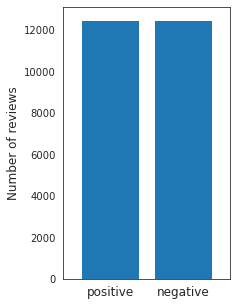

In [70]:
#fig,ax = plt.subplots()
sns.set_style('white')
fig, ax = plt.subplots(1,figsize=(3,5))
class_counts = train.groupby(['label']).count()
ax = class_counts['review'].plot(kind='bar', legend=False, width=0.8)
ax.set_xticklabels(['positive','negative'], rotation = 0, fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Number of reviews', fontsize=12)


;


### Text preprocessing

In [71]:
train.head()

,type,review,label
25000,train,Story of a man who has unnatural feelings for ...,neg
25001,train,Airport '77 starts as a brand new luxury 747 p...,neg
25002,train,This film lacked something I couldn't put my f...,neg
25003,train,"Sorry everyone,,, I know this is supposed to b...",neg
25004,train,When I was little my parents took me along to ...,neg


In [72]:
train.tail()

,type,review,label
49995,train,"Seeing as the vote average was pretty low, and...",pos
49996,train,"The plot had some wretched, unbelievable twist...",pos
49997,train,I am amazed at how this movie(and most others ...,pos
49998,train,A Christmas Together actually came before my t...,pos
49999,train,Working-class romantic drama from director Mar...,pos


In [73]:
train['label'].value_counts()

neg    12500
pos    12500
Name: label, dtype: int64

In [74]:
train['label'] = train['label'].map({'pos': 1, 'neg': 0})
len(train[train['label'] == 0])

12500

In [75]:
test['label'] = test['label'].map({'pos': 1, 'neg': 0})

In [76]:
len(train[train['label'] == 1])

12500

In [77]:
train['label'].value_counts()

0    12500
1    12500
Name: label, dtype: int64

In [78]:
#lower casing
def lower_case(text):
    return text.lower()


#remove html_tags
def remove_htmltags(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)


#remove numbers
def remove_numbers(text):
    output = re.sub(r'\d+', '', text)
    return output

# remove punctuation

import string
def remove_punctuation(text):
    text_p = "".join([char for char in text if char not in string.punctuation])
    return text_p

#tokenize text

import nltk
nltk.download('punkt')
from nltk import word_tokenize

def tokenize(text):
    words = word_tokenize(text)
    return words

#remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

def remove_stopwords(text):
    filtered_words = [word for word in text if word not in stop_words]
    return filtered_words

#stemming
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

def stem_words(text):
    stemmed = [stemmer.stem(word) for word in text]
    return stemmed

#lemmatize with POS Tag
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)



[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [79]:
# Lemmatize with POS Tag
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    lemmatized = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in text]
    return lemmatized



[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [80]:
class Preprocessor():
    def __init__(self):
        pass
    
    def preprocess(self,df_column, steps):
        self.df_column = df_column
        self.steps = steps
    
        if 'lower_case' in self.steps:
            self.df_column = self.df_column.apply(lambda x: lower_case(x))
        
        if 'remove_htmltags' in self.steps:
            self.df_column = self.df_column.apply(lambda x: remove_htmltags(x))
        
        if 'remove_numbers' in self.steps:
            self.df_column = self.df_column.apply(lambda x: remove_numbers(x))
        
        if 'remove_punctuation' in self.steps:
            self.df_column = self.df_column.apply(lambda x: remove_punctuation(x))           
        
        if 'tokenize' in self.steps:
            self.df_column = self.df_column.apply(lambda x: tokenize(x))
        
        if 'stopwords' in self.steps:
            self.df_column = self.df_column.apply(lambda x: remove_stopwords(x))
        
        if 'stemming' in self.steps:
            self.df_column = self.df_column.apply(lambda x: stem_words(x))
            
        if 'lemmatize' in self.steps:
            self.df_column = self.df_column.apply(lambda x: lemmatize(x))
            
        return self.df_column    
        
          

In [81]:
steps = ['lower_case','remove_html_tags','remove_numbers','remove_punctuation',
        'tokenize','stopwords','stemming']
processor = Preprocessor()
train_processed = processor.preprocess(train['review'],steps)
test_processed = processor.preprocess(test['review'],steps)

In [140]:
from sklearn.feature_extraction.text import CountVectorizer

def dummy(text):
    return text


train_reviews = list(train_processed)
test_reviews = list(test_processed)

cv = CountVectorizer(tokenizer=dummy,preprocessor=dummy, lowercase=False)
X_train = cv.fit_transform(train_reviews)
X_test = cv.transform(test_reviews)

In [141]:
X_train.shape

(25000, 90587)

In [83]:
y_train = train['label']
y_test = test['label']

from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train,y_train)
ypred_train = MNB.predict(X_train)
ypred_test = MNB.predict(X_test)

In [84]:
from sklearn.metrics import f1_score
train_score = f1_score(ypred_train,y_train)
test_score = f1_score(ypred_test,y_test)
print('Sklearn Naive Bayes, train set F1-score: {:.1f} %'.format(train_score*100))
print('Sklearn Naive Bayes, test set F1-score: {:.1f} %'.format(test_score*100))

Sklearn Naive Bayes, train set F1-score: 91.0 %
Sklearn Naive Bayes, test set F1-score: 80.7 %


In [123]:
class Naive_bayes():
    
    def __init__(self):
        
        pass
    
    def fit(self,X_train, y_train, k):
        
        self.X_train = X_train
        self.y_train = y_train
        self.k = k
        
        #prior probabilities
        positive_class_prob = len(y_train[y_train==1])/len(y_train)
        negative_class_prob = len(y_train[y_train==0])/len(y_train)
        
        #vocabulary size
        V = X_train.shape[1]
        
        #posterior probabilities for each token in vocabulary
        negative_matrix = X_train[0:12500,:]
        positive_matrix = X_train[12500::,:]

        positive_count = positive_matrix.sum(axis=0)
        negative_count = negative_matrix.sum(axis=0)

        positive_totalcount = positive_matrix.sum()
        negative_totalcount = negative_matrix.sum()
        
        log_positive_probs = np.log10((positive_count+self.k)/(positive_totalcount +V))
        log_negative_probs = np.log10((negative_count+self.k)/(negative_totalcount +V))
        
        self.positive_class_prob = positive_class_prob
        self.negative_class_prob = negative_class_prob
        self.log_positive_probs = log_positive_probs
        self.log_negative_probs = log_negative_probs
    
    
    def predict(self,X):
        self.X = X

        X_positive = X @ self.log_positive_probs.T + np.log10(self.positive_class_prob)
        X_negative = X @ self.log_negative_probs.T + np.log10(self.negative_class_prob)
        
        bool_array = np.asarray(X_positive > X_negative).flatten()
        ypred = bool_array.astype(int)
        
        return ypred
           

In [124]:
def F1_measure(y_true,y_pred):
    positives_index = list(y_true[y_true == 1].index)
    negatives_index = list(y_true[y_true == 0].index)
    
    tp = y_pred[positives_index].sum()
    tn = len(y_true[y_true == 0]) - y_pred[negatives_index].sum()
    fp = y_pred[negatives_index].sum()
    fn = len(y_true[y_true == 1]) - y_pred[positives_index].sum()
    
    F1_measure = tp/(tp + 0.5*(fp + fn))
    
    return F1_measure

In [125]:
clf = Naive_bayes()
clf.fit(X_train,y_train, k=1)
ytrain_pred = clf.predict(X_train)
ytest_pred = clf.predict(X_test)

In [126]:
#reset index for y_train
y_train_reset = y_train.reset_index(drop=True)

In [127]:
train_f1 = F1_measure(y_train_reset,ytrain_pred)
test_f1 = F1_measure(y_test,ytest_pred)
print('Naive Bayes implementation from scratch, train set F1-score: {:.1f} % '.format(train_f1*100))
print('Naive Bayes implementation from scratch, test set F1-score: {:.1f} %'.format(test_f1*100))

Naive Bayes implementation from scratch, train set F1-score: 91.0 % 
Naive Bayes implementation from scratch, test set F1-score: 80.7 %


### Analysis

#### Lemmatization

In [98]:
steps = ['lower_case','remove_html_tags','remove_numbers','remove_punctuation',
        'tokenize','stopwords','lemmatize']
processor = Preprocessor()
train_lem = processor.preprocess(train['review'],steps)
test_lem = processor.preprocess(test['review'],steps)

In [99]:
cv2 = CountVectorizer(tokenizer=dummy,preprocessor=dummy, lowercase=False)

In [100]:
X_train_lem = cv2.fit_transform(list(train_lem))
X_test_lem = cv2.transform(list(test_lem))
X_train_lem.shape

(25000, 104050)

In [128]:
clf.fit(X_train_lem,y_train, k=1)
ytrain_lem_pred = clf.predict(X_train_lem)
ytest_lem_pred = clf.predict(X_test_lem)

train_lem_f1 = f1_score(y_train_reset,ytrain_lem_pred)
test_lem_f1 = f1_score(y_test,ytest_lem_pred)
print('Naive Bayes after lemmatization, train set F1-score: {:.1f} % '.format(train_lem_f1*100))
print('Naive Bayes after lemmatization, test set F1-score: {:.1f} %'.format(test_lem_f1*100))


Naive Bayes after lemmatization, train set F1-score: 91.5 % 
Naive Bayes after lemmatization, test set F1-score: 81.0 %


### Binary Naive Bayes / Clipped Naive Bayes

In [102]:
#sklearn implementation of BernoulliNB
# from sklearn.naive_bayes import BernoulliNB
# BNB = BernoulliNB()
# BNB.fit(X_train_bn,y_train)
# ypred_train_bnb = BNB.predict(X_train_bn)
# ypred_test_bnb = BNB.predict(X_test_bn)

# train_score_bnb = f1_score(ypred_train_bnb,y_train)
# test_score_bnb = f1_score(ypred_test_bnb,y_test)
# print('Sklearn Bernoulli Naive Bayes, train set F1-score: {:.1f} %'.format(train_score_bnb*100))
# print('Sklearn Bernoulli Naive Bayes, test set F1-score: {:.1f} %'.format(test_score_bnb*100))

In [138]:
#binary NB implementation from scratch

from sklearn.preprocessing import binarize
X_train_bn = binarize(X_train,threshold = 0.0)
X_test_bn = binarize(X_test, threshold = 0.0)

clf.fit(X_train_bn,y_train, k=0.1)
ytrain_pred_bn = clf.predict(X_train_bn)
ytest_pred_bn = clf.predict(X_test_bn)
y_train_reset = y_train.reset_index(drop=True)
train_f1_bn = F1_measure(y_train_reset,ytrain_pred_bn)
test_f1_bn = F1_measure(y_test,ytest_pred_bn)
print('Binary Naive Bayes implementation from scratch, train set F1-score: {:.1f} % '.format(train_f1_bn*100))
print('Binary Naive Bayes implementation from scratch, test set F1-score: {:.1f} %'.format(test_f1_bn*100))


Binary Naive Bayes implementation from scratch, train set F1-score: 94.9 % 
Binary Naive Bayes implementation from scratch, test set F1-score: 80.6 %


In [135]:
#sklearn implementation of BernoulliNB
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB(alpha=0.1)
BNB.fit(X_train_bn,y_train)
ypred_train_bnb = BNB.predict(X_train_bn)
ypred_test_bnb = BNB.predict(X_test_bn)

train_score_bnb = f1_score(ypred_train_bnb,y_train)
test_score_bnb = f1_score(ypred_test_bnb,y_test)
print('Sklearn Bernoulli Naive Bayes, train set F1-score: {:.1f} %'.format(train_score_bnb*100))
print('Sklearn Bernoulli Naive Bayes, test set F1-score: {:.1f} %'.format(test_score_bnb*100))

Sklearn Bernoulli Naive Bayes, train set F1-score: 94.0 %
Sklearn Bernoulli Naive Bayes, test set F1-score: 79.5 %


### Generate word clouds

In [104]:
#use lemmatized train set for word clouds
negative_matrix_lem = X_train_lem[0:12500,:]
positive_matrix_lem = X_train_lem[12500::,:]

positive_count_lem = positive_matrix_lem.sum(axis=0)
negative_count_lem = negative_matrix_lem.sum(axis=0)

pos_array = np.asarray(positive_count_lem).reshape(-1)
neg_array = np.asarray(negative_count_lem).reshape(-1)

In [105]:
lem_vocab = cv2.vocabulary_
lem_df = pd.DataFrame(lem_vocab.items(), columns = ['word','id'])
lem_df = lem_df.sort_values(by=['id'])
lem_df.head()

,word,id
94236,a,0
33414,own,1
56879,aa,2
15155,aaa,3
47545,aaaaaaah,4


In [106]:
lem_df['pos_count'] = pos_array
lem_df['neg_count'] = neg_array
lem_df.head()

,word,id,pos_count,neg_count
94236,a,0,1,0
33414,own,1,0,1
56879,aa,2,5,2
15155,aaa,3,3,6
47545,aaaaaaah,4,0,1


In [107]:
#generate dataframes for top 200 postive and negative words
wordcloud_pos = lem_df[['word','pos_count']].sort_values(['pos_count'], ascending=False).iloc[0:200,:]
wordcloud_neg = lem_df[['word','neg_count']].sort_values(['neg_count'], ascending=False).iloc[0:200,:]
print('Top 10 positive class words... ')
print(wordcloud_pos.head(15))
print()
print('Top 10 negative class words...')
print(wordcloud_neg.head(15))

Top 10 positive class words... 
          word  pos_count
152         br      27824
177       film      24398
397      movie      21796
180        one      13706
57         see      10642
29        make      10310
165       like       9932
257        get       8112
43        well       7960
25        time       7771
46        good       7436
0        story       7197
49       great       6975
216  character       6869
411      watch       6385

Top 10 negative class words...
      word  neg_count
152     br      29828
397  movie      27799
177   film      21899
180    one      12958
29    make      12179
165   like      11777
214    bad      10708
57     see       9724
257    get       9628
31    even       7693
537     go       7295
411  watch       7238
46    good       7174
25    time       7135
43    well       7075


In [108]:
#drop rows with most frequent words found in both classes
wordcloud_pos = wordcloud_pos[wordcloud_pos['pos_count'] <11000]
wordcloud_neg = wordcloud_neg[wordcloud_neg['neg_count'] <11000]

#create dictionaries to generate word clouds
pos_dict = dict(zip(wordcloud_pos['word'], wordcloud_pos['pos_count']))
neg_dict = dict(zip(wordcloud_neg['word'], wordcloud_neg['neg_count']))

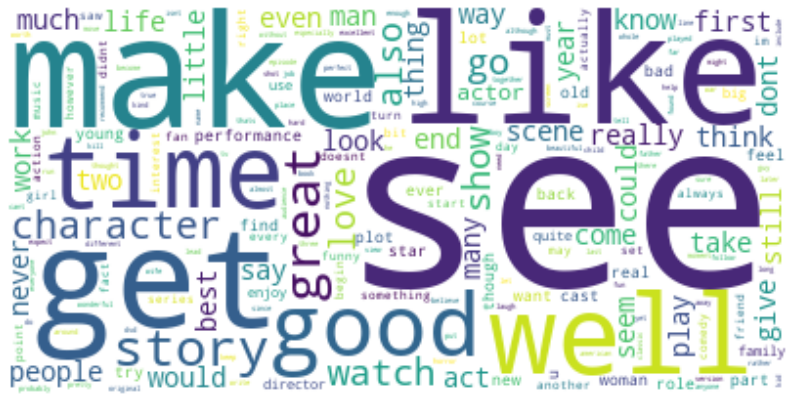

In [109]:
#word cloud for positive class
from wordcloud import WordCloud
cloud_pos = WordCloud(background_color='white').generate_from_frequencies(pos_dict)
plt.figure(figsize=(14, 11))
plt.imshow(cloud_pos, interpolation='bilinear')
plt.axis('off')
plt.show()

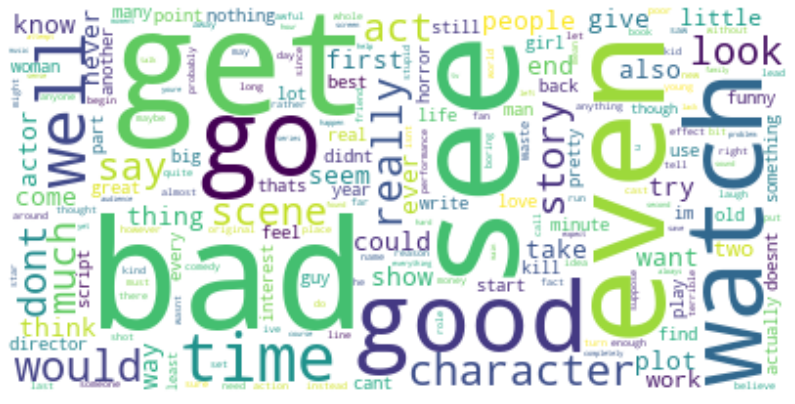

In [110]:
#word cloud for negative class
cloud_neg = WordCloud(background_color='white').generate_from_frequencies(neg_dict)
plt.figure(figsize=(14,11))
plt.imshow(cloud_neg, interpolation='bilinear')
plt.axis('off')
plt.show()